<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/Third/bayesian_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from gp import *
from plotters import *
import numpy as np 
%matplotlib inline
# Load the Python scripts that contain the Bayesian optimization code
%run ./gp.py
%run ./plotters.py

In [31]:
# define Objective function 
fun= lambda x: (4 - 2.1 * x[0] ** 2 + x[0] ** 4 / 3) * x[0] ** 2 + x[0] * x[1] + (-4 + 4 * x[1] ** 2) * x[1] ** 2

In [32]:
#Specify our bounds
bounds = np.array([[-3, 3], [-2, 2]])

In [4]:
xp, yp = bayesian_optimisation(n_iters=50, 
                               sample_loss=fun, 
                               bounds=bounds,
                               n_pre_samples=10,
                               random_search=100000)
#Print our iterative process along with our solution and objective function 
print('minimum objective function:', np.min(yp))
print('x1, x2 :',xp[np.argmin(yp)])

minimum objective function: -1.0293334941714485
x1, x2 : [ 0.11425787 -0.71442604]


In [11]:
#Import necessary libraries 
import matplotlib.pyplot as plt
X1 = np.linspace(-3, 3, 20)
X2 = np.linspace(-2, 2, 20)

param_grid = np.array([[C, x2] for x2 in X2 for C in X1])
real_loss = [fun(params) for params in param_grid]
# The maximum is at:
param_grid[np.array(real_loss).argmin(), :]

array([-0.15789474,  0.73684211])

In [29]:
np.min(real_loss)

-1.0105464727082059

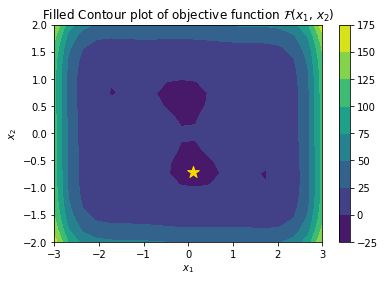

In [7]:
C, G = np.meshgrid(X1, X2)
result = np.array(real_loss).reshape(C.shape)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape))
plt.colorbar(cp)
plt.scatter(xp[np.argmin(yp)][0], xp[np.argmin(yp)][1], marker='*', c='gold', s=150)
plt.title('Filled Contour plot of objective function $\mathcal{F }$($x_{1}$, $x_{2}$)')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.show()

/content/plotters.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, sharey=True)
/content/plotters.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8), sharex=True, sharey=True)
/content/plotters.py:101: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning,

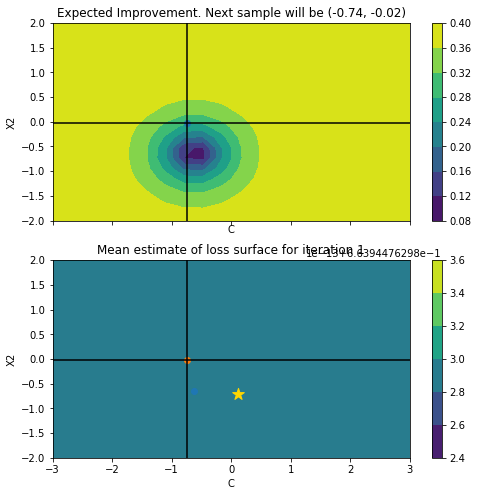

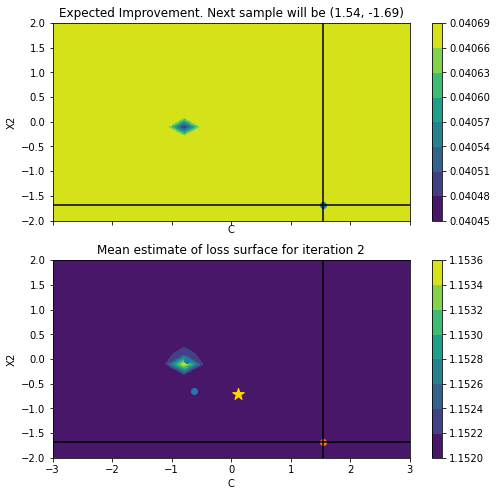

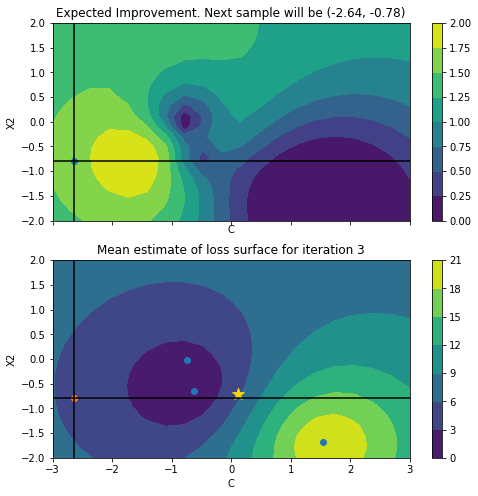

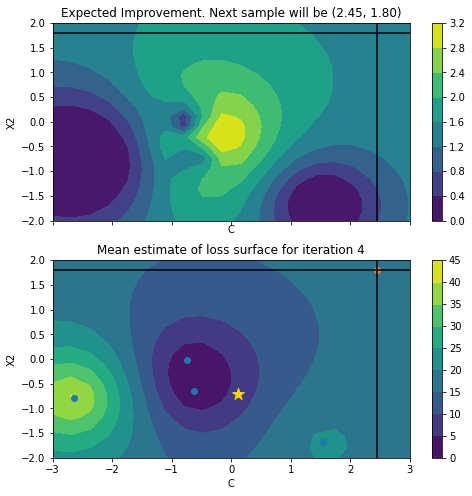

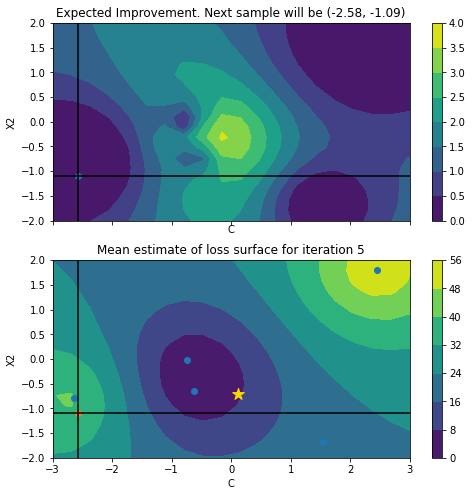

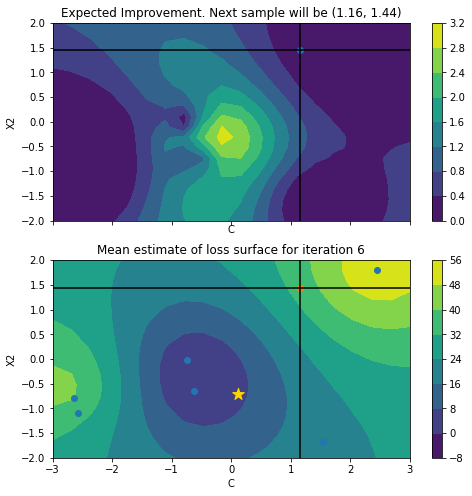

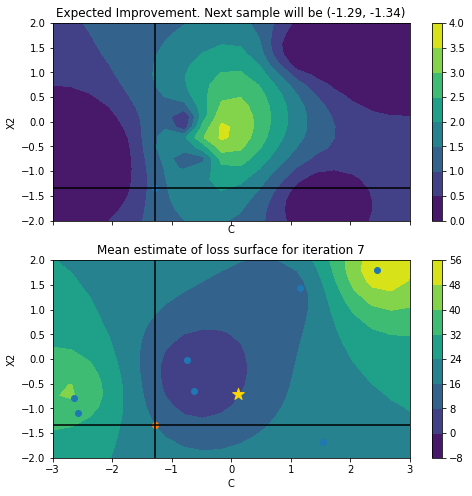

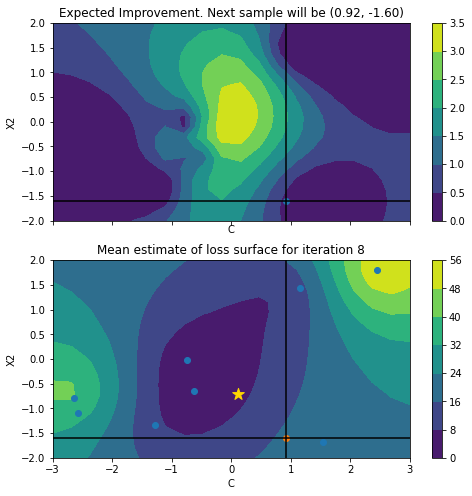

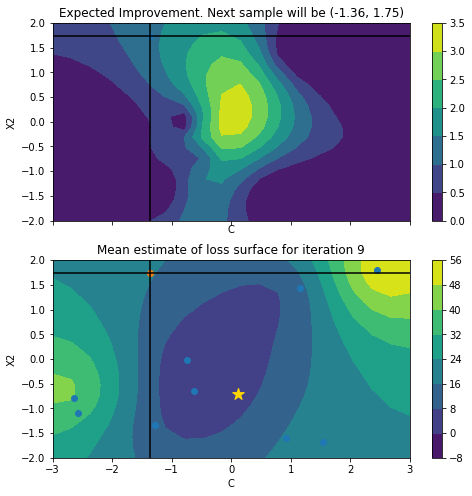

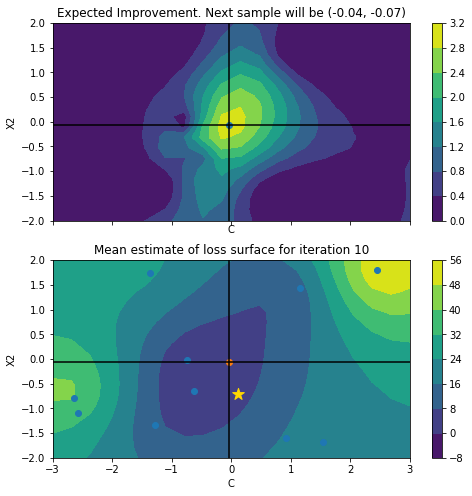

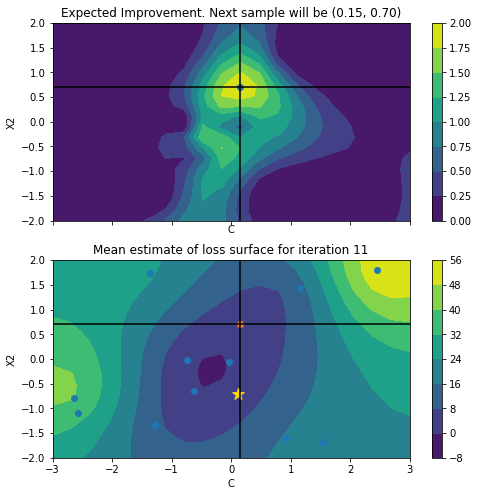

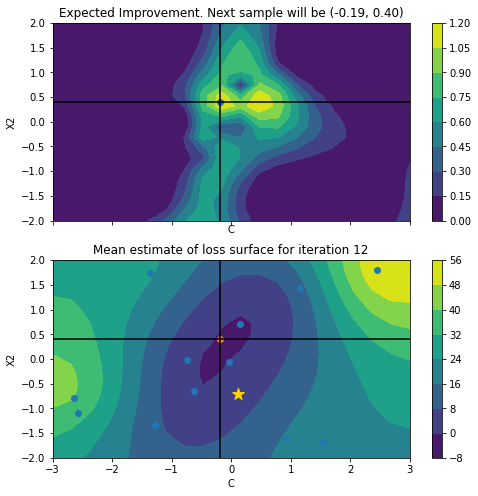

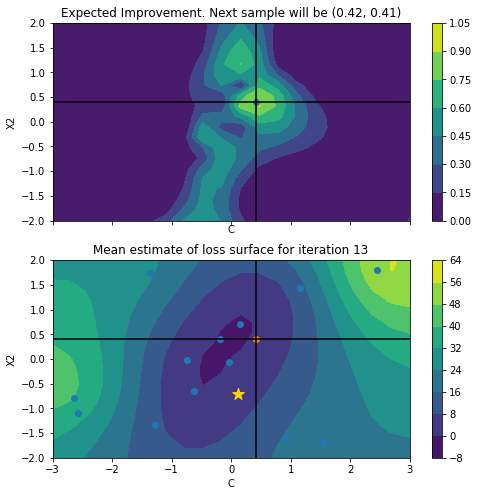

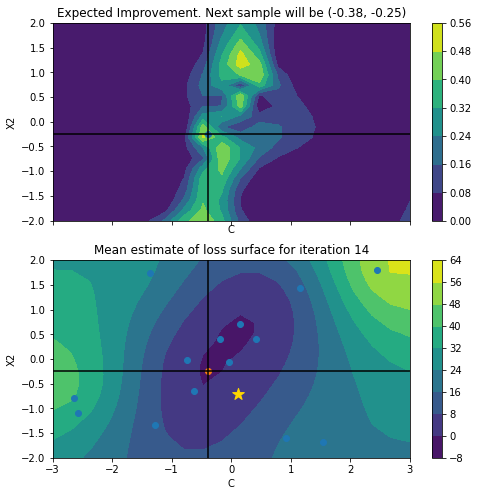

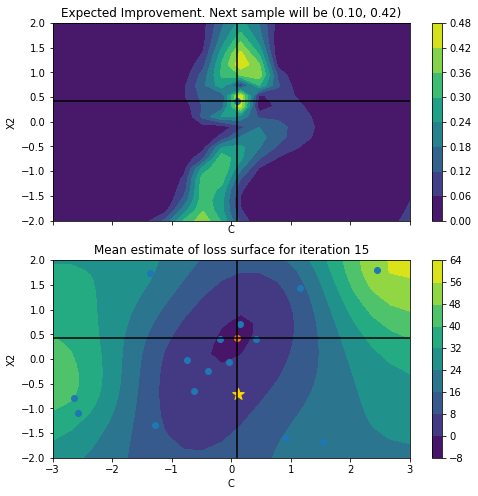

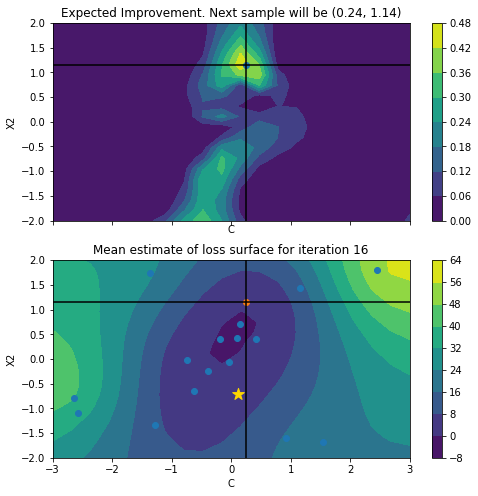

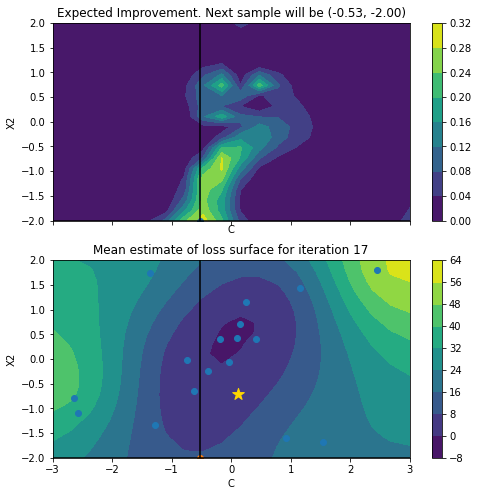

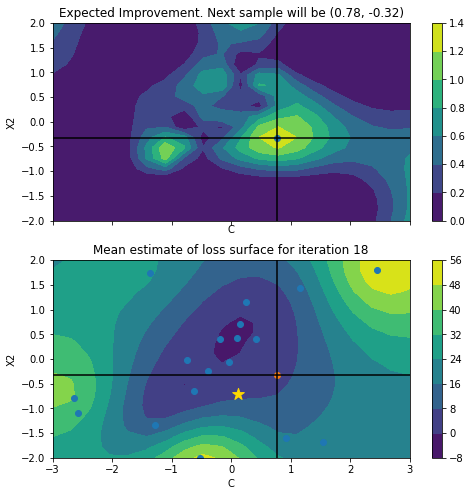

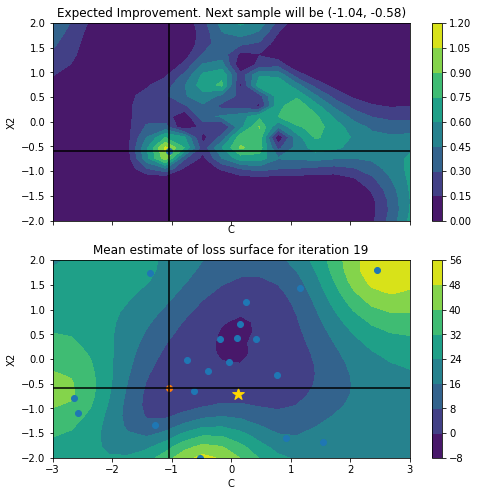

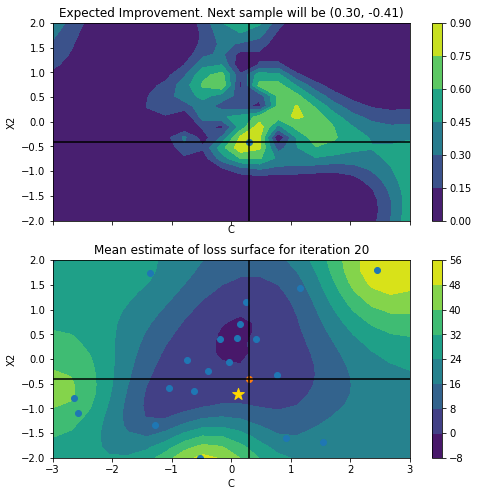

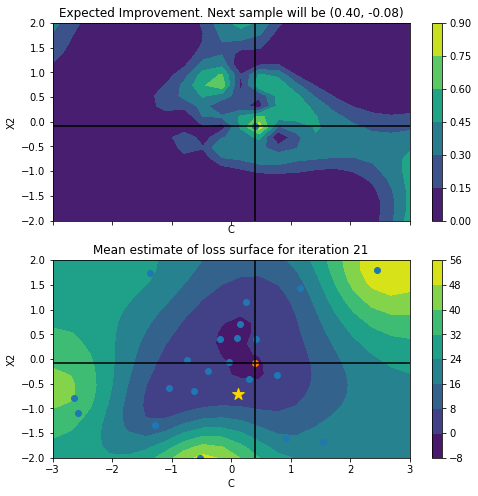

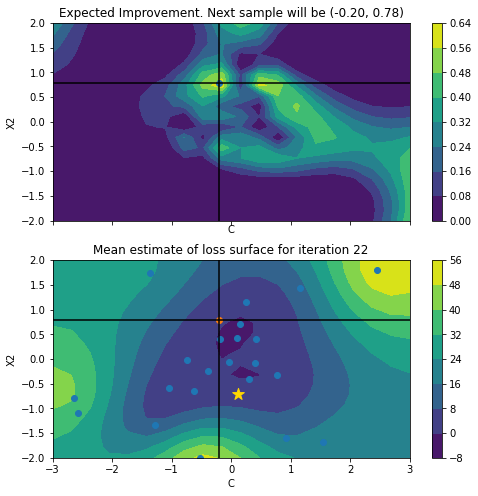

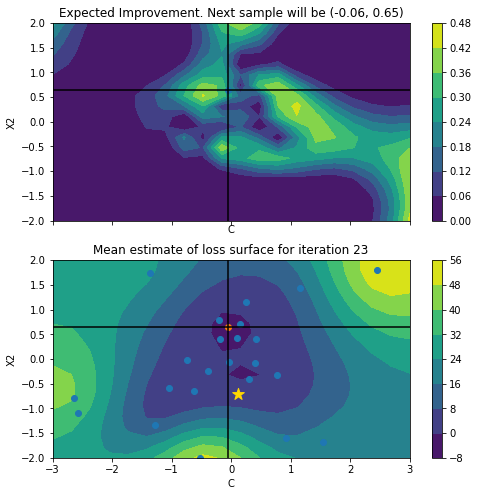

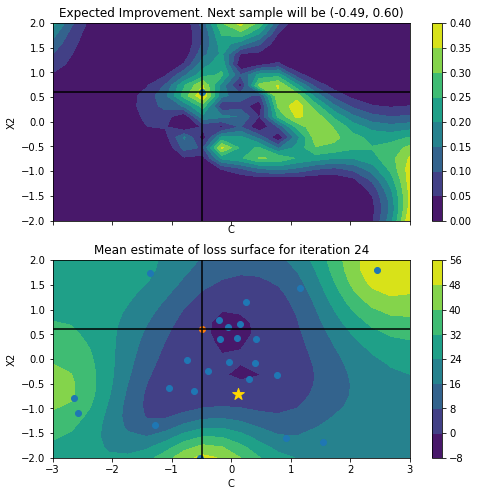

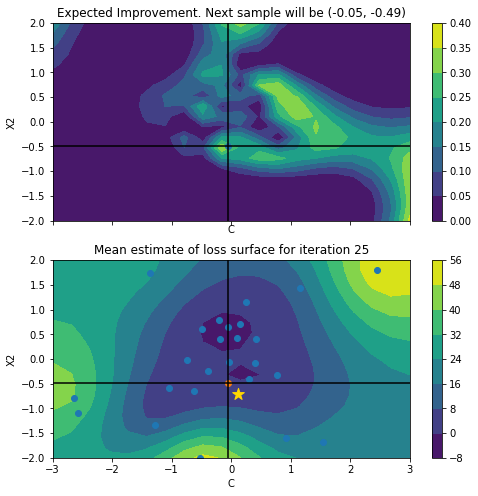

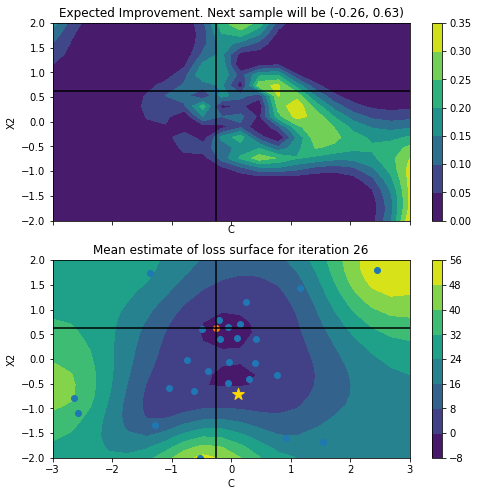

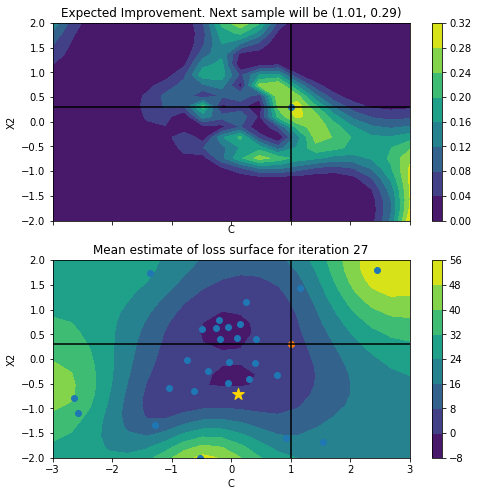

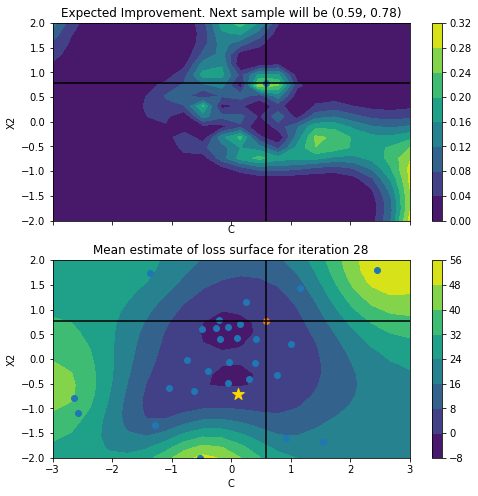

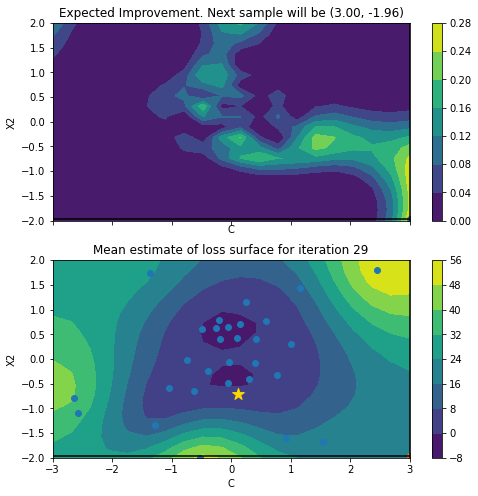

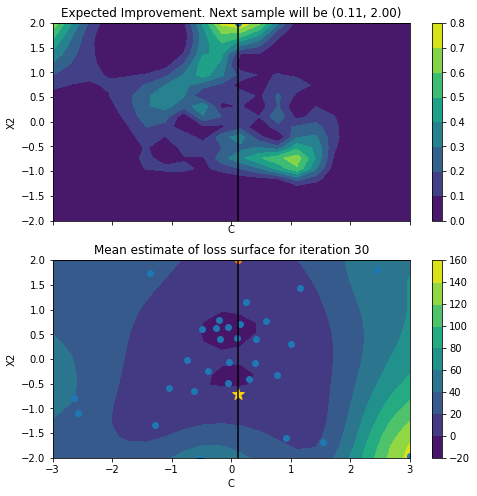

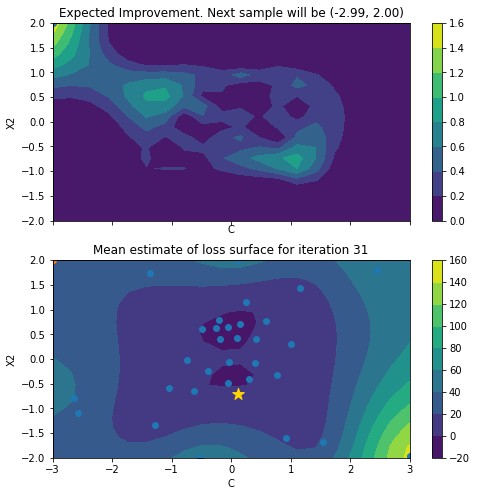

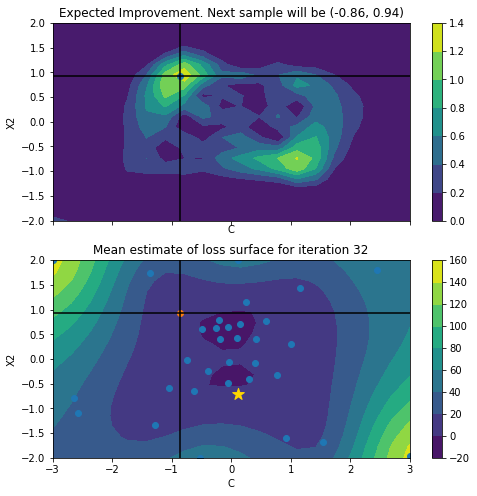

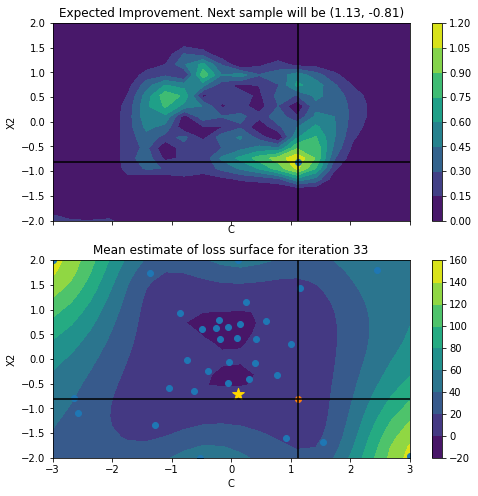

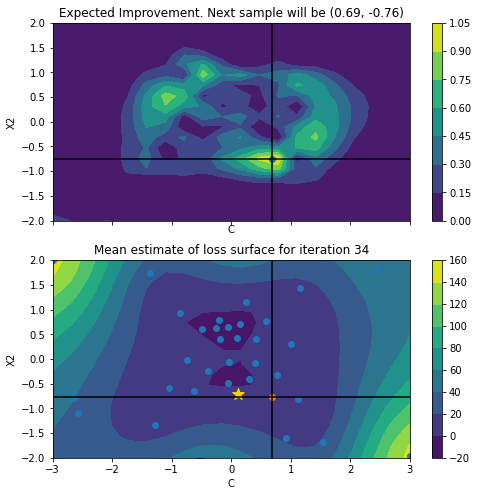

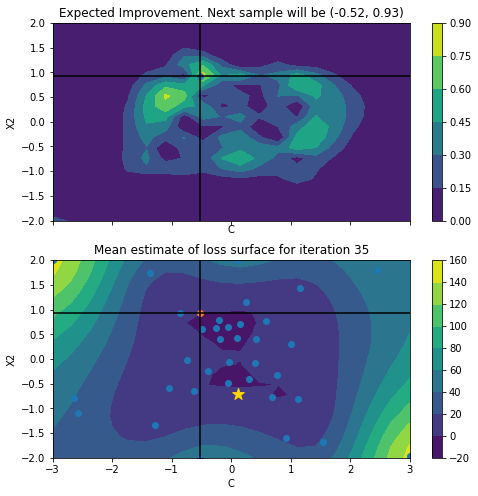

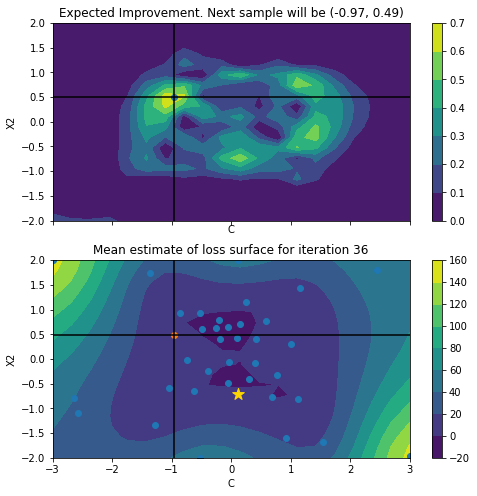

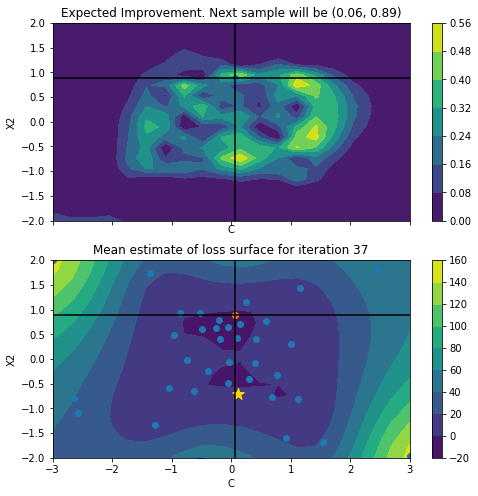

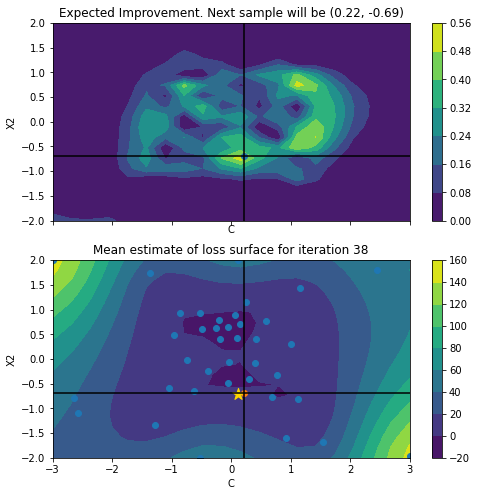

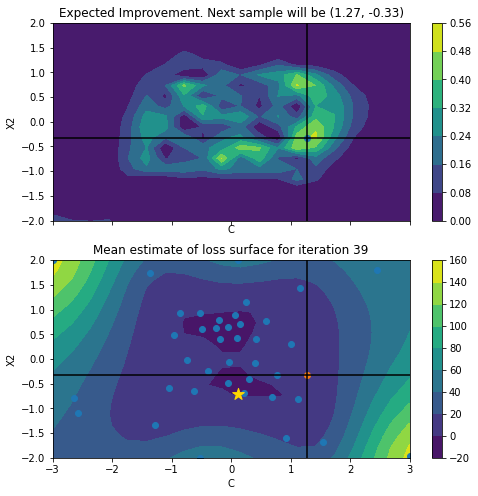

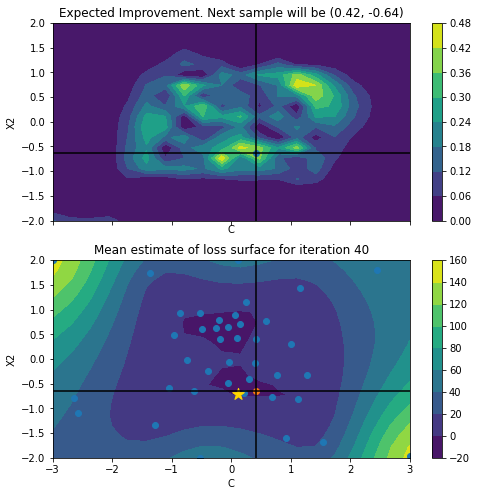

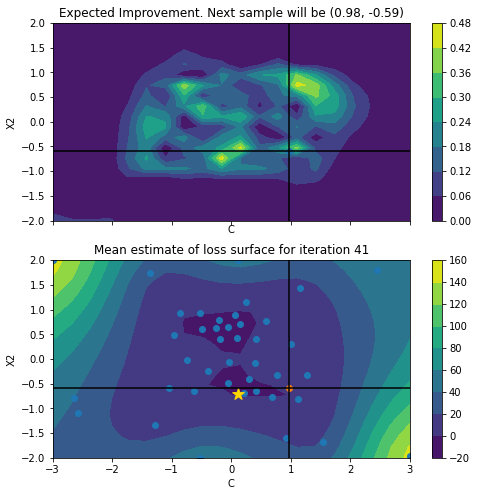

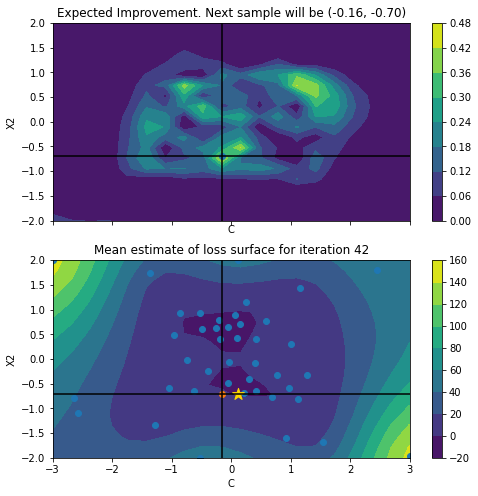

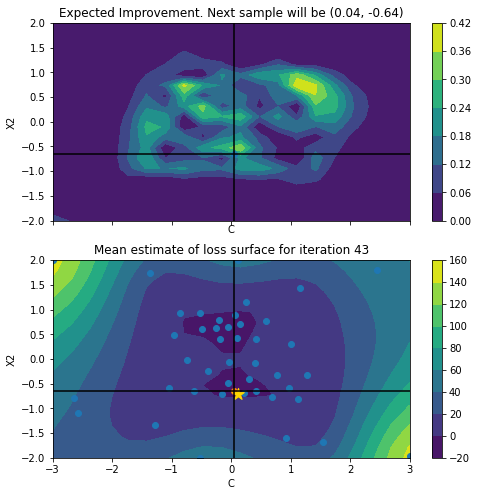

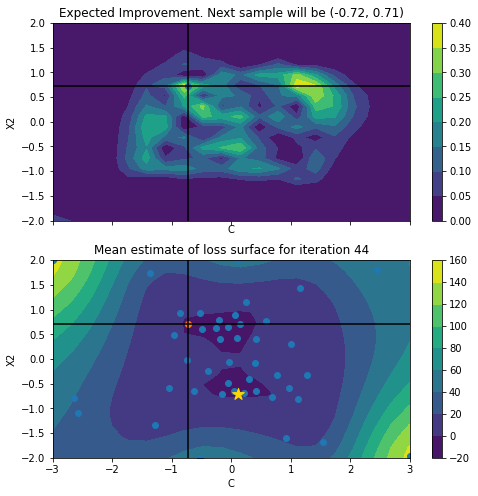

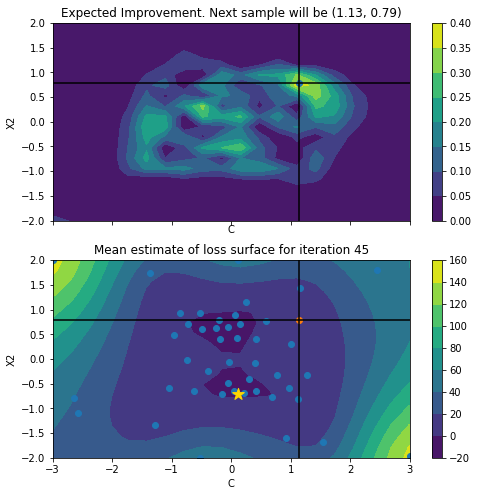

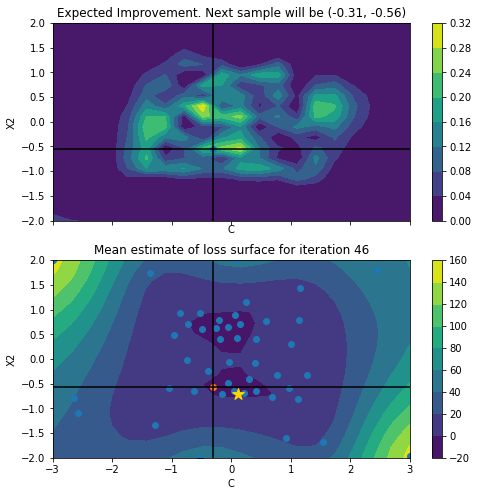

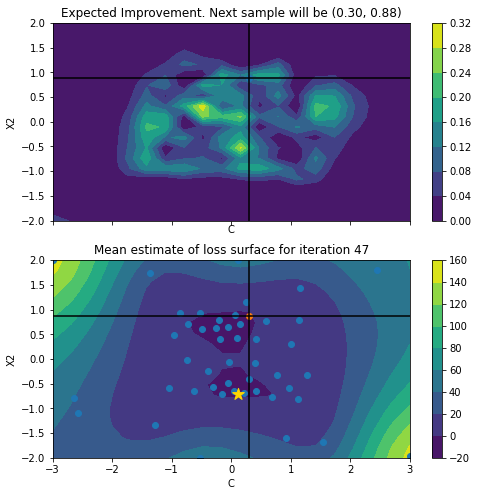

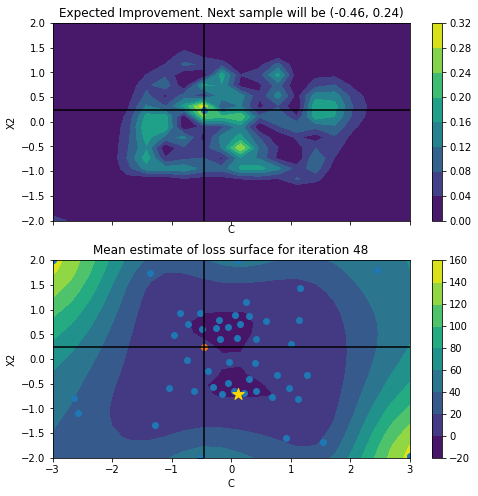

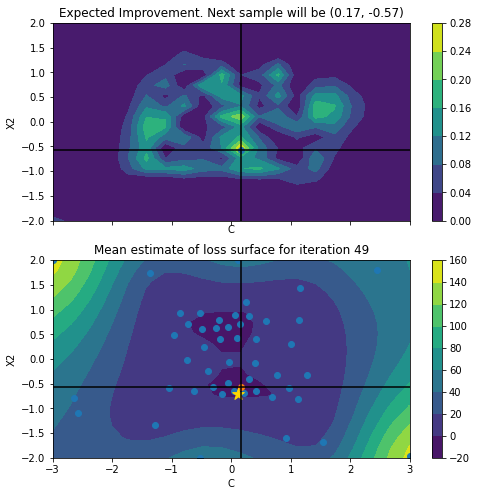

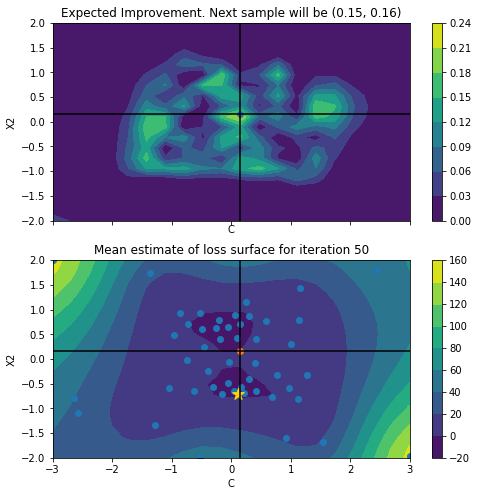

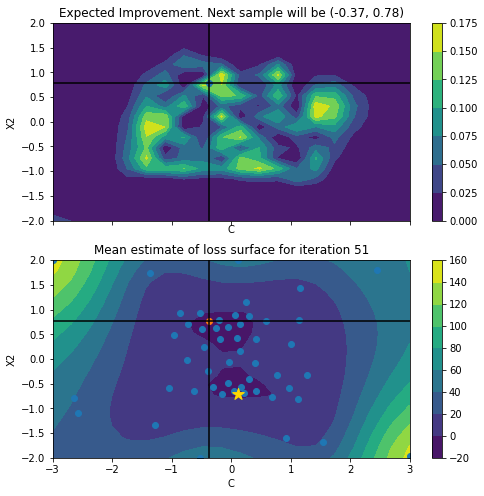

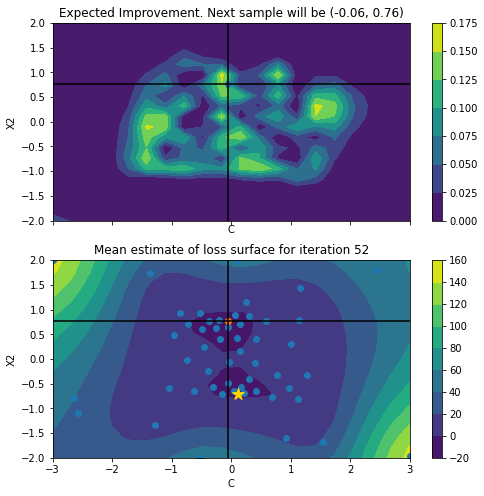

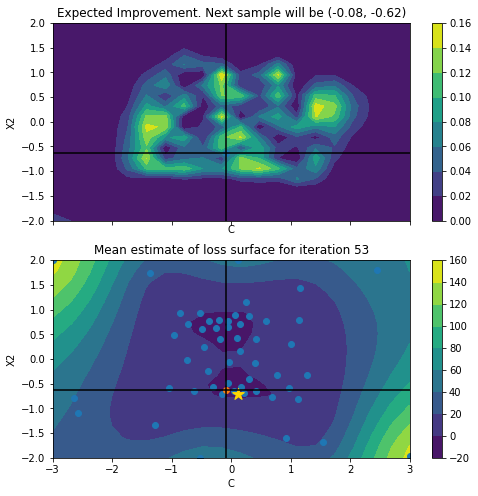

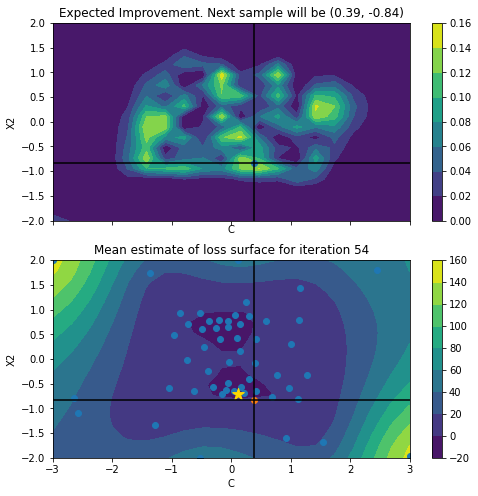

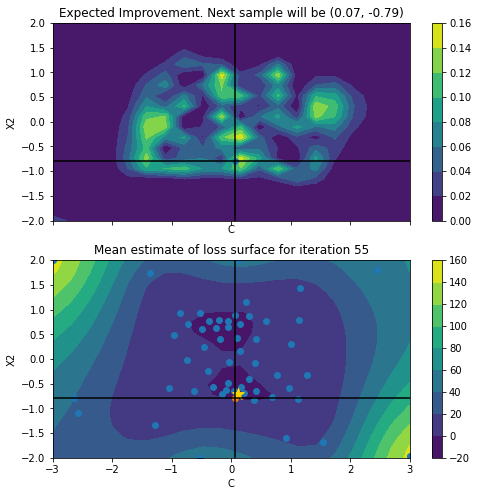

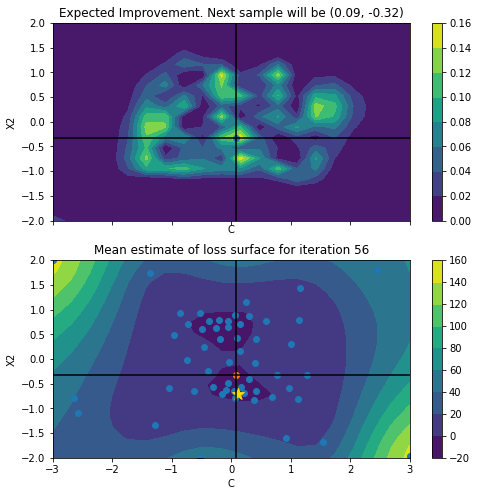

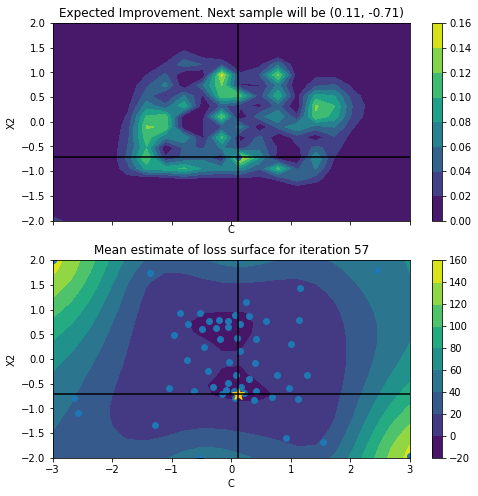

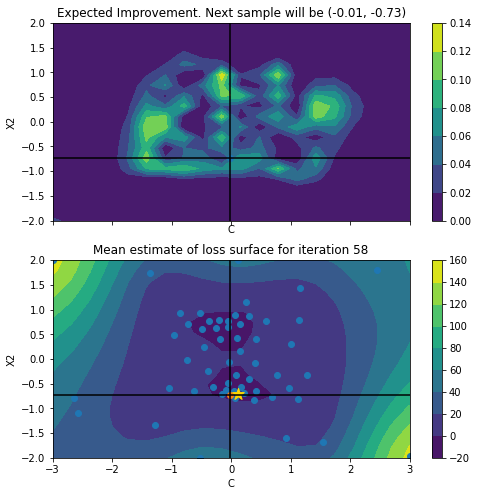

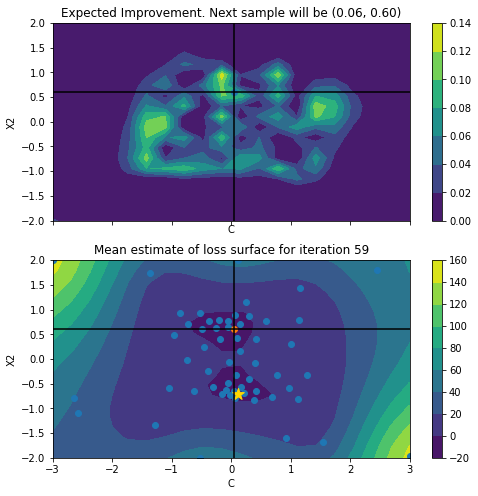

In [28]:
from scipy.optimize.minpack import greater
plot_iteration(X1, xp, yp, first_iter=0, second_param_grid=X2, optimum=[xp[np.argmin(yp)][0], xp[np.argmin(yp)][1]],greater_is_better=False)

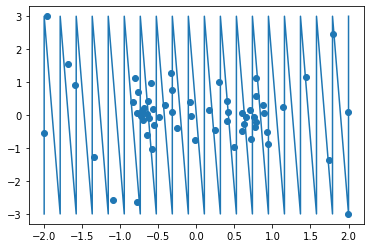

In [27]:
plt.plot(param_grid[:,1],param_grid[:,0])
plt.scatter(xp[:,1],xp[:,0])

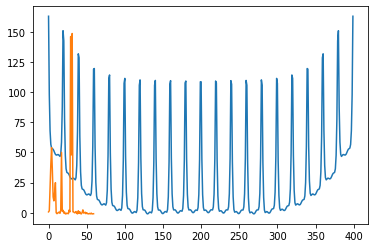

In [24]:
plt.plot(real_loss)
plt.plot(yp)